# Dataset Information: 

The dataset utilized for this project consists of a collection of T20 World Cup 2021 tweets, including information about user profiles, tweet timestamps, tweet text, hashtags, and more. This dataset serves as a comprehensive source of information for training and evaluating predictive models in the context of social media analysis. 

The dataset comprises the following columns:  

- **user_name**: The username of the tweet author. 
- **user_location**: The location specified in the user's profile. 
- **user_description**: The description provided in the user's profile. 
- **user_created**: The date when the user's Twitter account was created. 
- **user_followers**: The number of followers the user has. 
- **user_friends**: The number of accounts the user is following. 
- **user_favourites**: The number of tweets the user has marked as favorites. 
- **user_verified**: A binary indicator of whether the user's account is verified. 
- **date**: The timestamp of the tweet. 
- **text**: The content of the tweet. 
- **hashtags**: Any hashtags included in the tweet. 
- **source**: The source from which the tweet was posted. 
- **is_retweet**: A binary indicator of whether the tweet is a retweet. 

# Import necessary libraries

In [1]:
# Import necessary libraries and modules for data analysis, visualization, and machine learning.

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and analysis
import re  # Regular expressions for text cleaning
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Common words to be removed from text
from textblob import TextBlob  # Sentiment analysis and text processing
from wordcloud import WordCloud  # Generating word clouds for text visualization

# Machine learning components
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # Text data vectorization
from sklearn.linear_model import LogisticRegression  # Machine learning model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation metrics

In [2]:
# Disable warnings to suppress potential runtime warning messages
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
# Importing and Loading the T20 World Cup Tweets Dataset
t20=pd.read_excel("T20_Worldcup_tweets.xlsx")
# Display the First Few Rows of the Dataset
t20.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Prabhudatta Nayak🇮🇳,"Balangir, India",Proud to be an Indian ll #contestlover ll #bor...,21/05/10 11:05,134.0,532.0,6625.0,0.0,22/10/21 23:55,@ManappuramMAFIL Done Team \n@ManappuramMAFIL ...,"['GuessAndWin', 'T20WorldCup', 'Contest', 'Cri...",Twitter for Android,0.0
1,Archisman Mishra,"Bhubaneshwar, India","RISING FROM THE ASHES ENGINEER,GAMER,FOODY,POK...",10/12/15 18:43,656.0,762.0,5286.0,0.0,22/10/21 23:55,Set a reminder for my upcoming Space! https://...,"['T20WorldCup', 'AUSvSA']",Twitter for Android,0.0
2,T20 World Cup,NaN,Official account of the ICC T20 World Cup. Men...,19/04/18 12:46,378202.0,1097.0,296.0,1.0,22/10/21 23:55,"""We just try to enjoy everything that we do.""\...","['WestIndies', 'T20WorldCup']",Khoros Publishing App,0.0
3,Farid Khan,"Lahore, Pakistan",Journalist. Head of Digital Media @_cricingif ...,25/07/21 3:59,1125.0,424.0,56.0,0.0,22/10/21 23:54,#Pakistan and #India played each other in open...,"['Pakistan', 'India', 'IND', 'T20WorldCup', 'NZ']",Twitter Web App,0.0
4,Bimal Mirwani,Hong Kong,I write all about Pakistan cricket on my site ...,01/03/14 20:41,742.0,1433.0,811.0,0.0,22/10/21 23:49,#Pakistan won't be much of a challenge for #In...,"['Pakistan', 'India', 'Agarkar', 'AjitAgarkar'...",Twitter Web App,0.0


In [4]:
# Print the shape of the 't20' DataFrame to show the number of rows and columns.
t20.shape

(430383, 13)

# Data Preprocessing

In [5]:
# Convert the 'date' column to datetime format using pd.to_datetime()
t20['date'] = pd.to_datetime(t20['date'])

# Check and display the data types of all columns in the DataFrame
t20.dtypes

user_name                   object
user_location               object
user_description            object
user_created                object
user_followers             float64
user_friends               float64
user_favourites            float64
user_verified              float64
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
is_retweet                 float64
dtype: object

In [6]:
# Check for Missing Values
t20.isnull().sum()

user_name              369
user_location       107294
user_description     30267
user_created             2
user_followers           3
user_friends             3
user_favourites          3
user_verified            3
date                     3
text                     3
hashtags               412
source                   4
is_retweet               4
dtype: int64

In [7]:
# Drop rows with missing values in the DataFrame 't20'.
t20.dropna(inplace=True)

In [8]:
# Check and verify that there are no more missing values in the DataFrame
t20.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

In [9]:
# Check for Duplicates
t20[t20.duplicated()].count()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
is_retweet          0
dtype: int64

# Some Basic Information about the Dataset

In [10]:
# Display information about the structure and characteristics of the dataset.
t20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308547 entries, 0 to 430382
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         308547 non-null  object        
 1   user_location     308547 non-null  object        
 2   user_description  308547 non-null  object        
 3   user_created      308547 non-null  object        
 4   user_followers    308547 non-null  float64       
 5   user_friends      308547 non-null  float64       
 6   user_favourites   308547 non-null  float64       
 7   user_verified     308547 non-null  float64       
 8   date              308547 non-null  datetime64[ns]
 9   text              308547 non-null  object        
 10  hashtags          308547 non-null  object        
 11  source            308547 non-null  object        
 12  is_retweet        308547 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 3

In [11]:
# Generate a statistical summary of the dataset to display statistics for each column as rows, making it easier to analyze the data.
t20.describe().T

,count,mean,std,min,25%,50%,75%,max
user_followers,308547.0,144616.835471,1.027599e+06,0.0,115.0,505.0,2533.0,19362811.0
user_friends,308547.0,1172.289761,6.279618e+03,0.0,155.0,423.0,1004.0,1421189.0
user_favourites,308547.0,18284.112738,4.027918e+04,0.0,661.0,4435.0,17018.0,1299178.0
user_verified,308547.0,0.104597,3.060336e-01,0.0,0.0,0.0,0.0,1.0
is_retweet,308547.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [12]:
# Generate summary statistics for both numeric and non-numeric data types.
t20.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
user_name,308547,62669,Safi Khan,2711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_location,308547,20113,India,21217,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_description,308547,66965,I am Pakistani Scientist & Loving Human who Be...,2711,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_created,308547,67845,2019-09-27 13:44:03,2603,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_followers,308547.0,NaN,NaN,NaN,NaT,NaT,144616.835471,1027599.102907,0.0,115.0,505.0,2533.0,19362811.0
user_friends,308547.0,NaN,NaN,NaN,NaT,NaT,1172.289761,6279.6176,0.0,155.0,423.0,1004.0,1421189.0
user_favourites,308547.0,NaN,NaN,NaN,NaT,NaT,18284.112738,40279.180399,0.0,661.0,4435.0,17018.0,1299178.0
user_verified,308547.0,NaN,NaN,NaN,NaT,NaT,0.104597,0.306034,0.0,0.0,0.0,0.0,1.0
date,308547,217656,2021-10-22 13:20:00,81,2021-10-20 23:19:01,2021-12-30 23:31:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,308547,298260,When you're ready to lose the match but not yo...,30,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

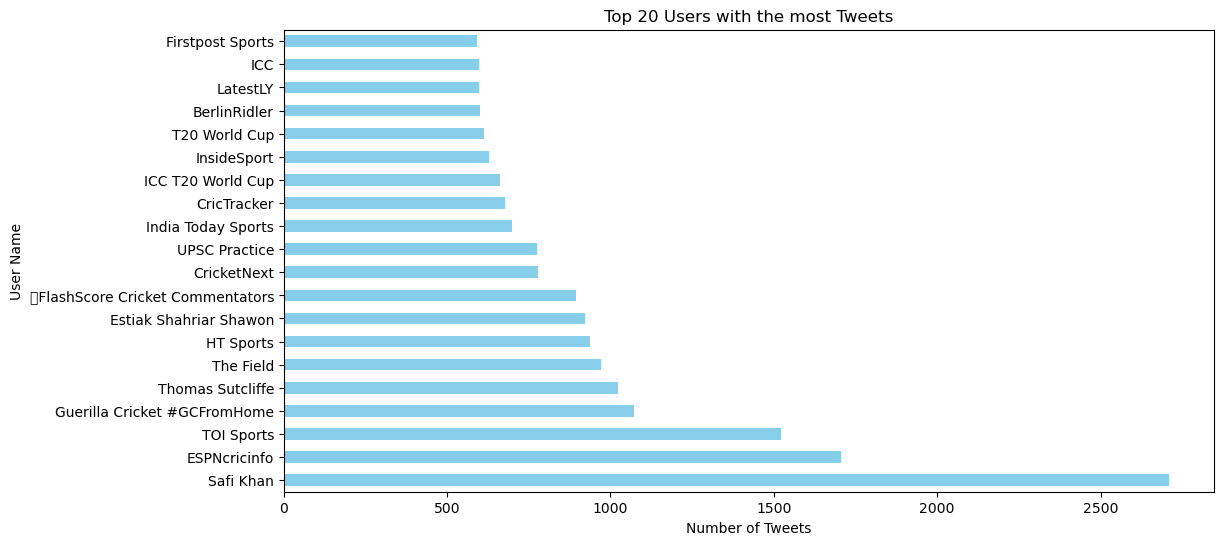

In [13]:
# Create a horizontal bar chart to visualize the top 20 users with the most tweets
plt.figure(figsize=(12, 6))  # Set the size of the figure for better visualization

# Count the number of tweets for each user and select the top 20 users
t20['user_name'].value_counts().head(20).plot(kind='barh', color='skyblue')

plt.title('Top 20 Users with the most Tweets')
plt.ylabel('User Name')
plt.xlabel('Number of Tweets')
# Display the bar chart to visualize the top tweeting users
plt.show()

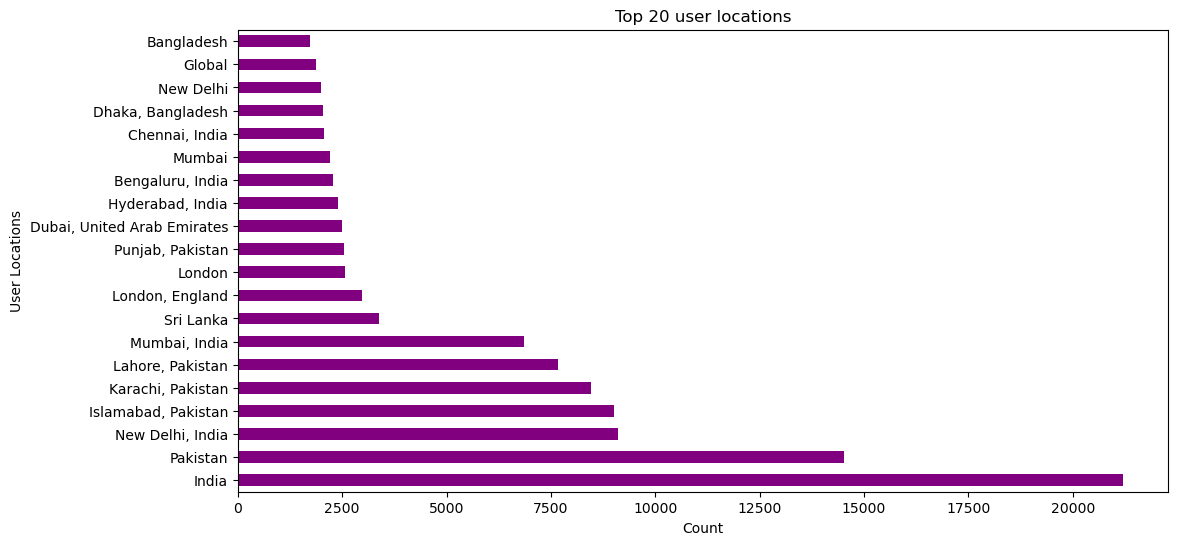

In [14]:
# Create a bar chart to visualize the top 20 user locations.
plt.figure(figsize=(12, 6))
t20['user_location'].value_counts().head(20).plot(kind='barh',color='purple')
# Add a title to the plot for context.
plt.title('Top 20 user locations')
# Label the y-axis and the x-axis.
plt.ylabel('User Locations')
plt.xlabel('Count')
# Display the plot.
plt.show()

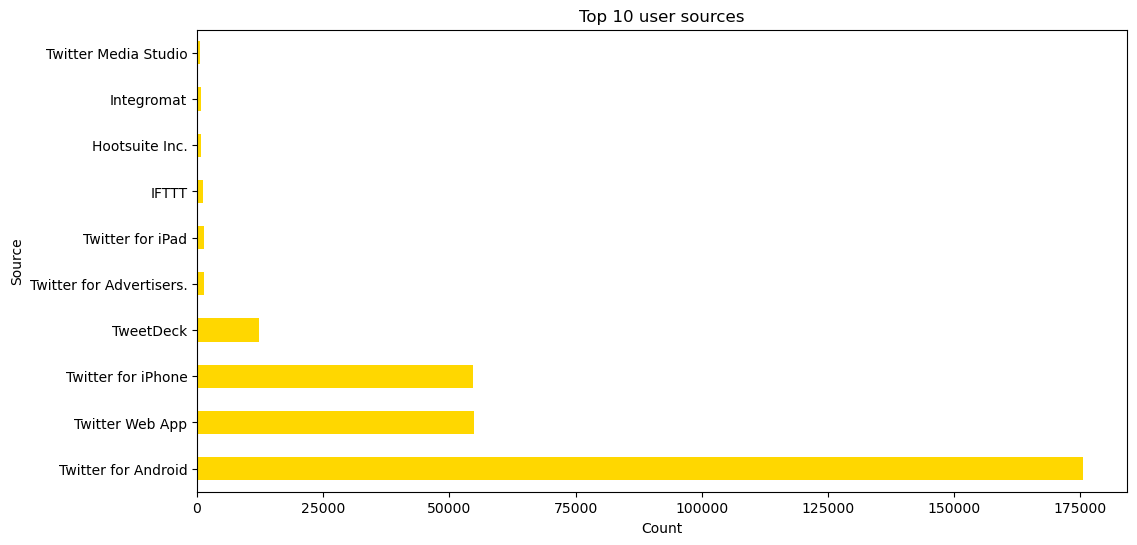

In [15]:
# Create a horizontal bar plot to visualize the top 10 user sources.
plt.figure(figsize=(12, 6))  # Set the figure size for the plot.
t20['source'].value_counts().head(10).plot(kind='barh',color='gold')  # Count and plot the top 10 user sources.
plt.title('Top 10 user sources')  # Set the plot title.
plt.ylabel('Source')  # Label the y-axis as 'Source.'
plt.xlabel('Count')  # Label the x-axis as 'Count.'
plt.show()  # Display the plot.

In [16]:
# The 'split_hashtags' function removes square brackets, splits hashtags into a list, and returns the list.
def split_hashtags(x):
    return str(x).replace('[', '').replace(']', '').split(',')

# Create a copy of the DataFrame to preserve the original data.
hashtags_df = t20.copy()
# Apply the 'split_hashtags' function to the 'hashtags' column, resulting in a new 'hashtag' column
hashtags_df['hashtag'] = hashtags_df['hashtags'].apply(lambda row : split_hashtags(row))
# Use the 'explode' function to transform the lists of hashtags into separate rows, creating a long-format DataFrame.
hashtags_df = hashtags_df.explode('hashtag')
# Clean the 'hashtag' column by converting it to lowercase and removing single quotes and spaces.
hashtags_df['hashtag'] = hashtags_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
# For rows where the hashtag is an empty string, replace it with 'NO HASHTAG.'
hashtags_df.loc[hashtags_df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'

The code effectively takes the original DataFrame with hashtags and transforms it into a more structured and cleaned DataFrame, where each row represents a single hashtag, making it easier to analyze and work with the data. Additionally, it ensures consistent formatting and handling of empty hashtags.

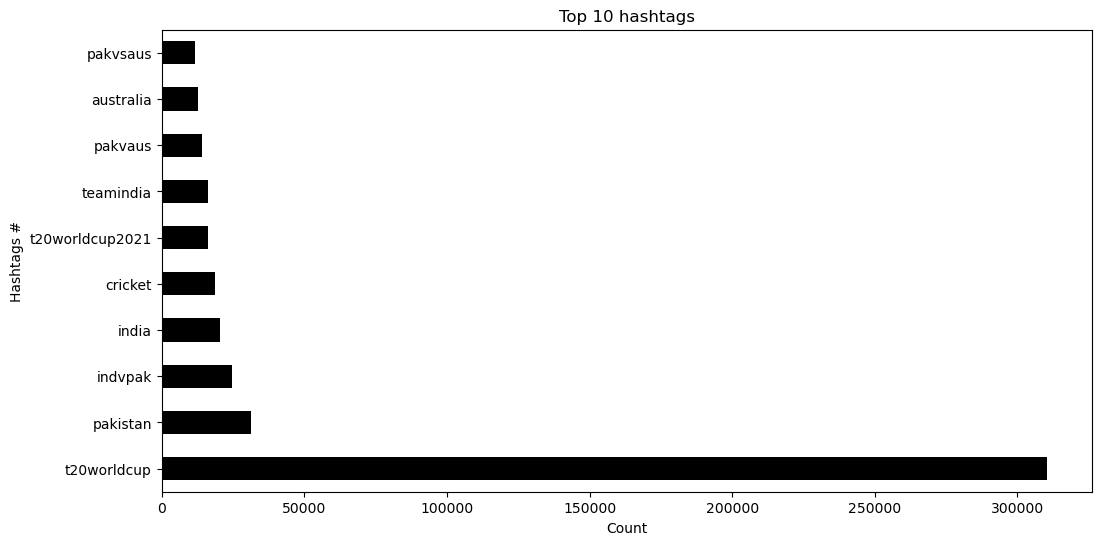

In [17]:
# Create a horizontal bar plot to visualize the top 10 hashtags in the dataset.
plt.figure(figsize=(12, 6))
hashtags_df['hashtag'].value_counts().head(10).plot(kind='barh',color='black')
plt.title('Top 10 hashtags')
plt.ylabel('Hashtags #')
plt.xlabel('Count')
plt.show()

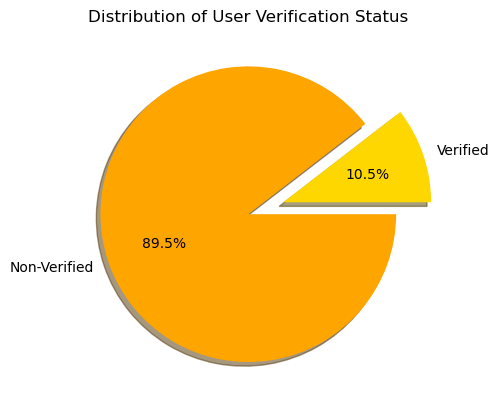

In [18]:
# Pie chart of user_verified
verified_count = t20['user_verified'].sum()
non_verified_count = len(t20) - verified_count
labels = ['Verified', 'Non-Verified']
sizes = [verified_count, non_verified_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True,explode=(0.25,0),colors=['gold','orange'])
plt.title('Distribution of User Verification Status')
plt.show()

# Tweets text analysis

In [19]:
# Clean and preprocess the text data
def preprocess_text(text):
    # Remove special characters and links
    text = re.sub(r'http\S+|www\S+|https\S+|[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

t20['cleaned_text'] = t20['text'].apply(preprocess_text)

The code processes the text data in the 'text' column, removing special characters, links, and converting the text to lowercase, and stores the cleaned text in a new column called 'cleaned_text' for further analysis or modeling.

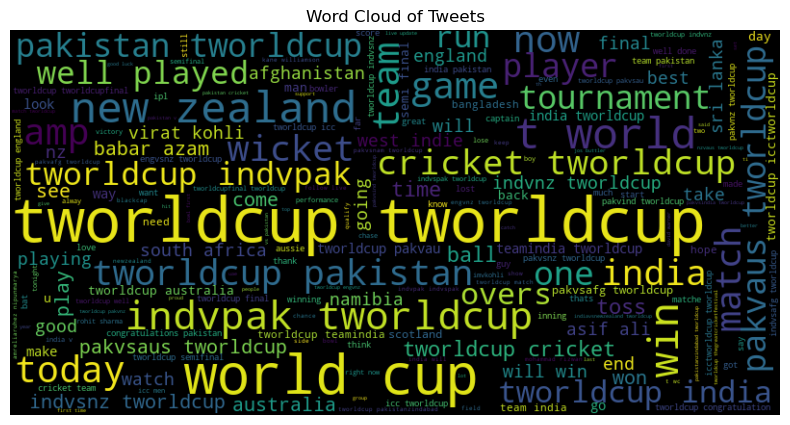

In [20]:
# Combine all cleaned text data into a single string
text_corpus = ' '.join(t20['cleaned_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis("off")
plt.show()

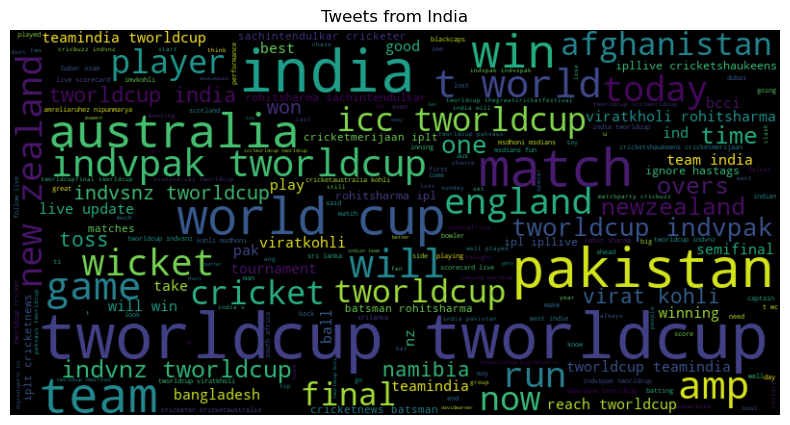

In [21]:
# Filter the DataFrame to select tweets with user location set as "India"
india_df = t20.loc[t20.user_location=="India"]

# Combine all cleaned text data into a single string
text_corpus = ' '.join(india_df['cleaned_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tweets from India')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [22]:
# Sentiment Analysis
def analyze_sentiment(text):
    # Create a TextBlob object to analyze sentiment
    analysis = TextBlob(text)
    
    # Determine sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis function to each text and create a 'sentiment' column
t20['sentiment'] = t20['cleaned_text'].apply(analyze_sentiment)

Sentiments are categorized as 'positive,' 'negative,' or 'neutral' based on the polarity score of the text. If the polarity is greater than 0, it's labeled as 'positive.' If it's less than 0, it's labeled as 'negative.' Otherwise, it's labeled as 'neutral.'

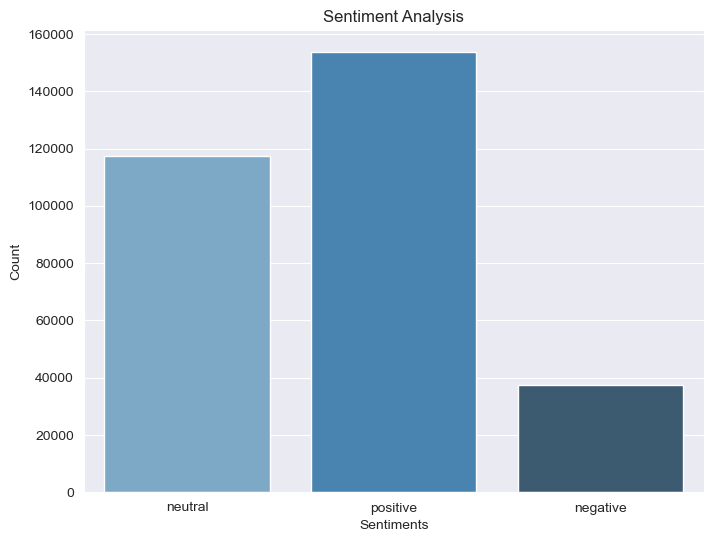

In [23]:
# Set the plotting style
sns.set_style('darkgrid')

# Create a countplot to visualize the distribution of sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=t20,palette='Blues_d')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

In [24]:
# Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(t20['cleaned_text'], t20['sentiment'], test_size=0.2, random_state=42)

In [25]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

# Logistic Regression

In [26]:
# Train a sentiment classification model (e.g., Logistic Regression)
lr=LogisticRegression(max_iter=1000)
lr.fit(xtrain_tfidf, ytrain)

LogisticRegression(max_iter=1000)

In [27]:
# Make predictions on the test set
pred = lr.predict(xtest_tfidf)
pred[:30]

array(['positive', 'neutral', 'negative', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'positive', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'negative', 'neutral',
       'negative', 'neutral', 'negative', 'neutral', 'neutral', 'neutral',
       'negative', 'positive', 'positive'], dtype=object)

In [28]:
# Calculate and print training and testing accuracy
train=lr.score(xtrain_tfidf,ytrain)
test=lr.score(xtest_tfidf,ytest)
print(train)
print(test)

0.9657709338551351
0.9587263004375304


# Model Evaluation

In [29]:
# Evaluate the model
accuracy=accuracy_score(ytest,pred)
matrix=confusion_matrix(ytest,pred)
report=classification_report(ytest,pred)

print(f' Accuracy: {accuracy}')
print('++++'*20)
print(f' Matrix:\n {matrix}')
print('++++'*20)
print(f' Report:\n {report}')
print('++++'*20)

 Accuracy: 0.9587263004375304
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Matrix:
 [[ 6129   556   877]
 [   75 23083   154]
 [  447   438 29951]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Report:
               precision    recall  f1-score   support

    negative       0.92      0.81      0.86      7562
     neutral       0.96      0.99      0.97     23312
    positive       0.97      0.97      0.97     30836

    accuracy                           0.96     61710
   macro avg       0.95      0.92      0.94     61710
weighted avg       0.96      0.96      0.96     61710

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Conclusion:

- The sentiment analysis successfully categorized tweets into 'positive,' 'negative,' or 'neutral' sentiments.
- The Logistic Regression model demonstrated strong predictive performance, particularly in terms of accuracy, precision, recall, and F1-scores.
- The model's performance was excellent, with high accuracy across all sentiment categories, making it a reliable tool for sentiment analysis in the context of T20 World Cup tweets.

In summary, the sentiment analysis and classification model provided valuable insights into the sentiment of tweets related to the T20 World Cup, and the model's high accuracy suggests that it can be a valuable tool for understanding the sentiment of the tweets in this dataset.

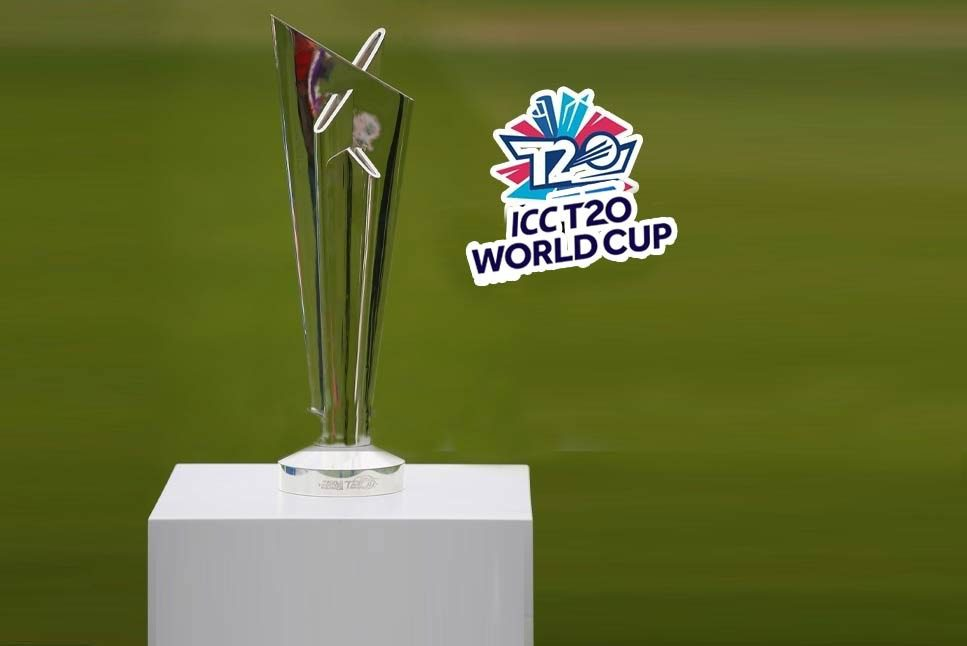